<IPython.core.display.Javascript object>


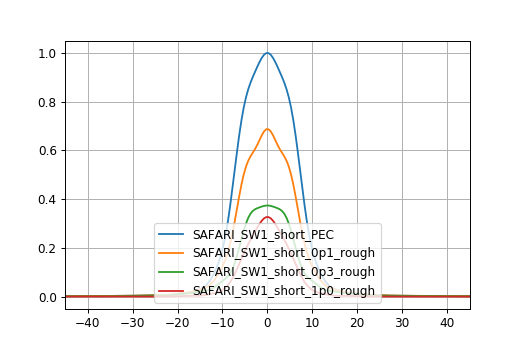

interactive(children=(Dropdown(description='Horn_Design', options=('Short', 'Medium', 'Long'), value='Short'),…

In [27]:
%matplotlib notebook
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

# set up plot
fig, ax = plt.subplots(figsize=(6, 4))


# generate x values
MAXPHI = np.pi/2
MAXTHETA = np.pi/2
STARTPHI=-np.pi/2
STARTTHETA = -np.pi/2
NUMPHI = 180
NUMTHETA = 360

PHI, THETA = np.meshgrid(np.linspace(STARTPHI,MAXPHI, NUMPHI), np.linspace(STARTTHETA,MAXTHETA,NUMTHETA))
x = np.rad2deg(THETA[:,0])
C = []
ET = []
 
def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))
 
 
@widgets.interact(Horn_Design=["Short","Medium","Long"],
                  PEC=True,
                  Rough0p1=False,
                  Rough0p3=False,
                  Rough1p0=False,
)

def update(Horn_Design,
           PEC,
           Rough0p1,
           Rough0p3,
           Rough1p0,
):
    """Remove old lines from plot and plot new one"""
        
    #[l.remove() for l in ax.lines]
    ax.clear()
    C = []
    ET = []
    if Horn_Design == "Short":
        name = "SAFARI_SW1_short"
        
        if PEC is True:
            load = name+"_PEC"
            ET.append(np.loadtxt("Farfield_Cuts/%s_90.dat"%load))
            C.append(load)
        if Rough0p1  is True:
            load = name+"_0p1_rough"
            ET.append(np.loadtxt("Farfield_Cuts/%s_90.dat"%load))
            C.append(load)
        if Rough0p3 is True:
            load = name+"_0p3_rough"
            ET.append(np.loadtxt("Farfield_Cuts/%s_90.dat"%load))
            C.append(load)
        if Rough1p0 is True:
            load = name+"_1p0_rough"
            ET.append(np.loadtxt("Farfield_Cuts/%s_90.dat"%load))
            C.append(load)
            
    else:
        print("NA")
        
        
    for Cn in C:
        print(Cn)
    MAX = np.max(np.asarray(ET))
    for Cn, ETn in zip(C,ET):
        ax.plot(x, ETn/MAX,label=Cn)
    ax.legend(loc="lower center")
    ax.set_xlim([-45, 45])
    ax.grid(True)     